In [404]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import random 
from sklearn import metrics

In [405]:
data=pd.read_csv("SCDB_2018_01_caseCentered_Docket.csv",encoding="unicode_escape")

In [406]:
data=data[data.columns.difference(['dateRearg','adminAction','petitionerState','caseOriginState','caseSourceState','respondentState','adminActionState','authorityDecision2','lawMinor'])]

In [407]:
data1=data.dropna()

In [408]:
data.shape

(10336, 44)

In [409]:
data1.shape

(6509, 44)

In [410]:
#data1_0=data1[data1.apply(lambda x: x['partyWinning'] == 0,axis='columns')]
#data1_1=data1[data1.apply(lambda x: x['partyWinning'] == 1,axis='columns')]


In [411]:
data1["partyWinning"].value_counts()

1.0    4085
0.0    2424
Name: partyWinning, dtype: int64

In [412]:
data1.to_csv("docket_with_date.csv")

In [413]:
data2=data1[data1.columns.difference(['chief','caseDisposition','dateArgument','caseName','caseId','docketId','caseIssuesId','voteId','usCite','sctCite','dateDecision','lexisCite','ledCite','docket'])]

In [414]:
data2.nunique()

authorityDecision1            7
caseDispositionUnusual        2
caseOrigin                  128
caseSource                   84
certReason                   13
decisionDirection             3
decisionDirectionDissent      2
decisionType                  2
declarationUncon              4
issue                       248
issueArea                    14
jurisdiction                  5
lawSupp                     170
lawType                       8
lcDisagreement                2
lcDisposition                12
lcDispositionDirection        3
majOpinAssigner              22
majOpinWriter                36
majVotes                      6
minVotes                      5
naturalCourt                 31
partyWinning                  2
petitioner                  251
precedentAlteration           2
respondent                  239
splitVote                     1
term                         66
threeJudgeFdc                 2
voteUnclear                   2
dtype: int64

In [415]:
col_names=data2.columns

col_names2=[]
for col in col_names:

    if col=='chief':
 
             data2[col] = data2[col].astype('category',copy=False)
             col_names2.append(col)
        
    else :
        
        continue
    

   for col in col_names2:
                data2[col] = data2[col].cat.codes  

In [416]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 9799
Data columns (total 30 columns):
authorityDecision1          6509 non-null float64
caseDispositionUnusual      6509 non-null float64
caseOrigin                  6509 non-null float64
caseSource                  6509 non-null float64
certReason                  6509 non-null float64
decisionDirection           6509 non-null float64
decisionDirectionDissent    6509 non-null float64
decisionType                6509 non-null int64
declarationUncon            6509 non-null float64
issue                       6509 non-null float64
issueArea                   6509 non-null float64
jurisdiction                6509 non-null int64
lawSupp                     6509 non-null float64
lawType                     6509 non-null float64
lcDisagreement              6509 non-null float64
lcDisposition               6509 non-null float64
lcDispositionDirection      6509 non-null float64
majOpinAssigner             6509 non-null float

In [417]:
Target=data2['partyWinning']
X=data2[data2.columns.difference(['partyWinning'])]
#data1.groupby(['chief'])['partyWinning'].value_counts()

In [418]:
#data1.groupby(['jurisdiction'])['lawType'].value_counts()

# CART variable selection

In [419]:
from   sklearn.model_selection import  cross_val_score
from   sklearn.tree            import  DecisionTreeClassifier
import matplotlib.pyplot       as      plt
import numpy                   as      np

In [420]:
clf       = DecisionTreeClassifier(criterion='gini',random_state=0)

In [421]:
fit       = clf.fit(X,Target)

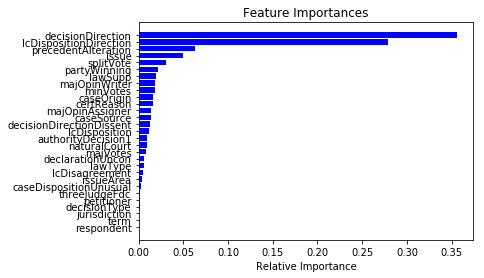

In [422]:
features    = data2.columns
importances = fit.feature_importances_
indices     = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### It can be  seen that the most important feature is Case disposition followed by decision direction,term and natural court

# Random Forest

In [423]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X,Target)
for name, importance in zip(features, rnd_clf.feature_importances_):
     print(name, "=", importance)

authorityDecision1 = 0.00668649351463
caseDispositionUnusual = 0.00292332818442
caseOrigin = 0.0210743735708
caseSource = 0.0161572449323
certReason = 0.0133523405771
decisionDirection = 0.203871385735
decisionDirectionDissent = 0.0145530485959
decisionType = 0.00102453426243
declarationUncon = 0.0152999732381
issue = 0.0463354635791
issueArea = 0.00582081971207
jurisdiction = 0.000483627252982
lawSupp = 0.0172546776282
lawType = 0.00375214564307
lcDisagreement = 0.00483592689858
lcDisposition = 0.0124150614455
lcDispositionDirection = 0.434806057484
majOpinAssigner = 0.0123023845001
majOpinWriter = 0.0224628609815
majVotes = 0.00806438241491
minVotes = 0.0107389796778
naturalCourt = 0.00948238492733
partyWinning = 0.0272129026659
petitioner = 0.000975485232149
precedentAlteration = 0.061967176144
respondent = 0.0
splitVote = 0.0252931255672
term = 0.000293479024851
threeJudgeFdc = 0.000560336610071


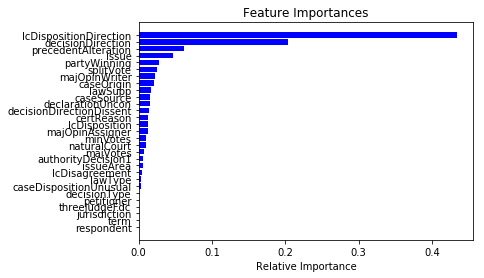

In [424]:
importances = rnd_clf.feature_importances_
indices     = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### It can be  seen that the most important feature is Case disposition followed by decision direction,respondent,petitioner term and issue

In [425]:
y=Target

### Spliiting into training and testing datasets

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

### Building the model

In [427]:
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

In [428]:
clf = clf.fit(X_train, y_train)

In [429]:
pred_y_train = clf.predict(X_train)
pred_y_train


array([ 0.,  1.,  0., ...,  1.,  0.,  0.])

In [430]:
pred_y_test = clf.predict(X_test)
pred_y_test

array([ 1.,  1.,  0., ...,  1.,  0.,  1.])

In [431]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_y_test)
score

0.93855606758832566

In [432]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y_test)

array([[ 677,   40],
       [  80, 1156]])

In [433]:
pred_y_train = clf.predict(X_train )
pred_y_train


array([ 0.,  1.,  0., ...,  1.,  0.,  0.])

### classification accuracy of our model

In [434]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.94490781387181744

In [435]:
y_train_prob = clf.predict_proba(X_train)

In [436]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)


0.98869550627019875

### Accuracy of the test set

In [437]:
pred_y_test = clf.predict(X_test)
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.93855606758832566

In [438]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.97258782322965609

### Cross validation function¶

In [439]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_train , y_train, cv = 10, scoring='roc_auc')

scores.std()

0.017509144728920581

In [440]:
scores.mean()

0.96495894262794002

#### Tuning the Classifier using GridSearchCV

In [441]:
from sklearn.grid_search import GridSearchCV

In [442]:
param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              }

In [443]:
tree_cv  = GridSearchCV(clf, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 100)


In [444]:
tree_cv.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.685103 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.690664 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.604176 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.693711 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 ................

[CV] ............ criterion=gini, max_depth=7, score=0.963127 -   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.0s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.877296 -   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.0s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.973510 -   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.972043 -   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.969827 -   0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46

[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.835036 -   0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.719544 -   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.835283 -   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.864871 -   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.5s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_dep

[CV] ......... criterion=entropy, max_depth=8, score=0.984383 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.960521 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.965918 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.879778 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.972299 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.970586 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.967169 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] .

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=100)

In [446]:
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

Tuned Decision Tree parameter : {'criterion': 'gini', 'max_depth': 9}


### CART-Building the model with best parameters

In [447]:
classifier = tree_cv.best_estimator_

In [448]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [449]:
y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_train = auc(fpr, tpr)
auc_train

0.98766995603550967

In [450]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_test = auc(fpr, tpr)
auc_test

0.97286992277242923

#### Rank Ordering

In [451]:
drank=X_train
drank['partyWinning']=y_train

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [452]:
drank["prob_score"] = y_train_prob[:,1]
drank["prob_score"] 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2075    0.021552
9638    1.000000
5444    0.363636
3348    1.000000
8343    0.993902
6828    0.993902
7662    0.000000
4758    0.473684
9329    0.947368
1463    1.000000
7521    1.000000
6003    0.805556
4950    0.000000
937     0.000000
2083    0.058824
3529    1.000000
4958    0.989691
7943    1.000000
271     0.993902
8217    1.000000
1477    0.346939
2287    0.000000
9396    0.454545
1498    1.000000
8893    1.000000
6220    1.000000
8982    0.039370
5660    0.473684
957     0.050000
7586    1.000000
          ...   
6124    0.993902
5424    0.039370
7267    0.021552
721     0.989474
7927    0.993902
4021    1.000000
9741    0.805556
8720    1.000000
4836    0.989691
6350    0.508772
5800    0.000000
6894    0.000000
3658    0.000000
872     0.000000
5451    0.222222
5131    0.058824
2295    0.993902
510     0.931034
3462    0.993902
9443    0.916667
5572    0.039370
89      0.840000
9611    0.333333
9415    0.993902
161     0.021552
3306    1.000000
9460    0.222222
3143    1.0000

#### scoring step
#### decile code

In [453]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s) 

In [454]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [455]:
Rank = Rank_Ordering(drank,"prob_score","partyWinning")
Rank

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
6,10,1.000000,1.000000,1.000000,1482.0,1482.0,0.0,100.000000,1482.0,0.0,0.520183,0.000000,0.520183
5,7,0.993902,0.993902,0.993902,656.0,652.0,4.0,99.390244,2134.0,4.0,0.749035,0.002343,0.746691
4,6,0.989474,0.989691,0.989583,192.0,190.0,2.0,98.958333,2324.0,6.0,0.815725,0.003515,0.812210
3,5,0.508772,0.964286,0.822581,434.0,357.0,77.0,82.258065,2681.0,83.0,0.941032,0.048623,0.892409
2,4,0.130952,0.473684,0.274900,502.0,138.0,364.0,27.490040,2819.0,447.0,0.989470,0.261863,0.727607
1,3,0.039370,0.105263,0.056872,422.0,24.0,398.0,5.687204,2843.0,845.0,0.997894,0.495021,0.502873
0,2,0.000000,0.021552,0.006912,868.0,6.0,862.0,0.691244,2849.0,1707.0,1.000000,1.000000,0.000000


In [456]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

gini(drank["prob_score"])

0.3654313498475053

#### Let us see the Rank Ordering on Test Data

In [457]:
dranktest=X_test
dranktest['partyWinning']=y_test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [458]:
dranktest["prob_score"] = y_test_prob[:,1]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [459]:
Rank_test = Rank_Ordering(dranktest,"prob_score","partyWinning")
Rank_test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
6,10,1.000000,1.000000,1.000000,639.0,631.0,8.0,98.748044,631.0,8.0,0.510518,0.011158,0.499360
5,7,0.993902,0.993902,0.993902,297.0,295.0,2.0,99.326599,926.0,10.0,0.749191,0.013947,0.735244
4,6,0.989691,0.989691,0.989691,41.0,41.0,0.0,100.000000,967.0,10.0,0.782362,0.013947,0.768415
3,5,0.677419,0.989474,0.895899,196.0,180.0,16.0,91.836735,1147.0,26.0,0.927994,0.036262,0.891731
2,4,0.130952,0.600000,0.296666,213.0,61.0,152.0,28.638498,1208.0,178.0,0.977346,0.248257,0.729090
1,3,0.039370,0.105263,0.057616,208.0,15.0,193.0,7.211538,1223.0,371.0,0.989482,0.517434,0.472048
0,2,0.000000,0.021552,0.007490,359.0,13.0,346.0,3.621170,1236.0,717.0,1.000000,1.000000,0.000000


In [460]:
y_test.value_counts()

1.0    1236
0.0     717
Name: partyWinning, dtype: int64

In [461]:
rr=1236*100/(1236+717)

In [462]:
Rank_test['rrate']/rr

6    1.560315
5    1.569457
4    1.580097
3    1.451110
2    0.452516
1    0.113949
0    0.057218
Name: rrate, dtype: float64

### Building Model on Random Forest

###### Scaling the data

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [512]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [513]:
rf_pred_y_train = rnd_clf.predict(X_train)
rf_pred_y_train
X_train.head()

,authorityDecision1,caseDispositionUnusual,caseOrigin,caseSource,certReason,decisionDirection,decisionDirectionDissent,decisionType,declarationUncon,issue,...,majVotes,minVotes,naturalCourt,petitioner,precedentAlteration,respondent,splitVote,term,threeJudgeFdc,voteUnclear
2075,4.0,0.0,94.0,22.0,12.0,1.0,0.0,1,1.0,20280.0,...,8,0,1406,27.0,0.0,106.0,1,1960,0.0,0.0
9638,4.0,0.0,48.0,29.0,12.0,1.0,0.0,1,1.0,30060.0,...,6,3,1703,327.0,0.0,149.0,1,2009,0.0,0.0
5444,2.0,0.0,302.0,301.0,12.0,1.0,0.0,1,1.0,80060.0,...,6,3,1506,28.0,0.0,208.0,1,1978,0.0,0.0
3348,2.0,0.0,26.0,26.0,12.0,2.0,0.0,1,1.0,60030.0,...,8,0,1410,111.0,0.0,28.0,1,1967,0.0,0.0
8343,4.0,0.0,48.0,29.0,2.0,2.0,0.0,1,1.0,120010.0,...,9,0,1607,27.0,0.0,240.0,1,1996,0.0,0.0


#### Classification accuracy of the model

In [514]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, rf_pred_y_train)
score

0.99802458296751539

#### AUC

In [515]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,confusion_matrix

rf_y_train_prob = rnd_clf.predict_proba(X_train)
fpr, tpr, thresholds =  roc_curve(y_train, rf_y_train_prob[:,1])
auc(fpr, tpr)

0.99998211070267307

#### Checking for Test data

In [517]:
rf_pred_y_test = rnd_clf.predict(X_test)
rf_pred_y_test

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

####  classification accuracy of RF model


In [518]:
score_test = accuracy_score(y_test, rf_pred_y_test)
score_test


0.92165898617511521

In [519]:
rf_y_test_prob = rnd_clf.predict_proba(X_test)
fpr, tpr, thresholds =  roc_curve(y_test, rf_y_test_prob[:,1])
auc(fpr, tpr)

0.9697250770695951

In [520]:
from sklearn import model_selection
scores = model_selection.cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='roc_auc')
scores.mean()

0.94553463111756419

In [521]:
scores.std()

0.012987243447713284

In [522]:
X_train.head()

,authorityDecision1,caseDispositionUnusual,caseOrigin,caseSource,certReason,decisionDirection,decisionDirectionDissent,decisionType,declarationUncon,issue,...,majVotes,minVotes,naturalCourt,petitioner,precedentAlteration,respondent,splitVote,term,threeJudgeFdc,voteUnclear
2075,4.0,0.0,94.0,22.0,12.0,1.0,0.0,1,1.0,20280.0,...,8,0,1406,27.0,0.0,106.0,1,1960,0.0,0.0
9638,4.0,0.0,48.0,29.0,12.0,1.0,0.0,1,1.0,30060.0,...,6,3,1703,327.0,0.0,149.0,1,2009,0.0,0.0
5444,2.0,0.0,302.0,301.0,12.0,1.0,0.0,1,1.0,80060.0,...,6,3,1506,28.0,0.0,208.0,1,1978,0.0,0.0
3348,2.0,0.0,26.0,26.0,12.0,2.0,0.0,1,1.0,60030.0,...,8,0,1410,111.0,0.0,28.0,1,1967,0.0,0.0
8343,4.0,0.0,48.0,29.0,2.0,2.0,0.0,1,1.0,120010.0,...,9,0,1607,27.0,0.0,240.0,1,1996,0.0,0.0


In [523]:
feature_imp = pd.Series(rnd_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False) 
feature_imp

lcDispositionDirection      0.167611
decisionDirection           0.159288
respondent                  0.079759
issue                       0.067833
petitioner                  0.063028
term                        0.045987
majOpinWriter               0.045571
issueArea                   0.041300
caseSource                  0.037582
caseOrigin                  0.037306
naturalCourt                0.035105
lawSupp                     0.031099
lcDisposition               0.028331
majOpinAssigner             0.027400
certReason                  0.026287
majVotes                    0.020894
minVotes                    0.020150
declarationUncon            0.016239
lawType                     0.012903
authorityDecision1          0.011565
lcDisagreement              0.009606
decisionDirectionDissent    0.004287
caseDispositionUnusual      0.002974
jurisdiction                0.002692
decisionType                0.002354
threeJudgeFdc               0.001148
precedentAlteration         0.000993
v

No handles with labels found to put in legend.


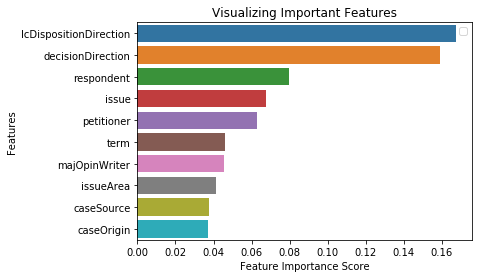

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp=feature_imp[0:10,]

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Parameter Tuning

In [525]:
import time
from sklearn.grid_search import GridSearchCV

In [ ]:
np.random.seed(20)
start = time.time()

param_dist = {
    
              'n_estimators':np.arange(10,20),
              'max_depth': np.arange(3,20),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rnd_clf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [527]:
rf_classifier = cv_rf.best_estimator_
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### AUC

In [528]:
cl_rf_y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, cl_rf_y_train_prob[:,1])
auc_train = auc(fpr, tpr)
auc_train

0.95479415690311986